# Advance Bank Term Deposit

## Introduction
This notebook provides a detailed analysis of customer behavior and insights into factors influencing term deposit subscription.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('data.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
df[df.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [6]:
df = df.drop_duplicates()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Customer Demographics Analysis

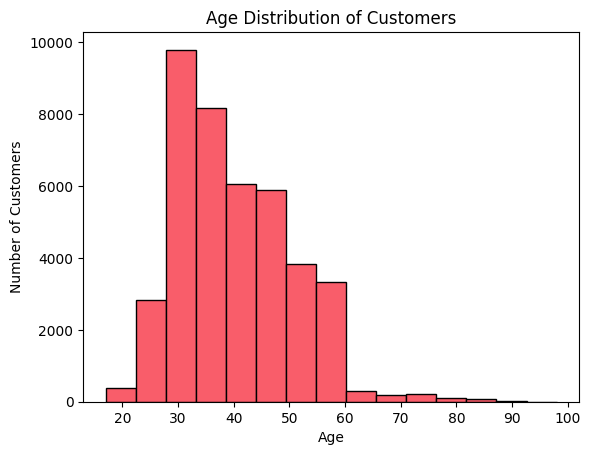

In [7]:
# Age distribution
plt.figure()
plt.hist(df['age'], bins=15, color = '#f95d6a', edgecolor = 'Black')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

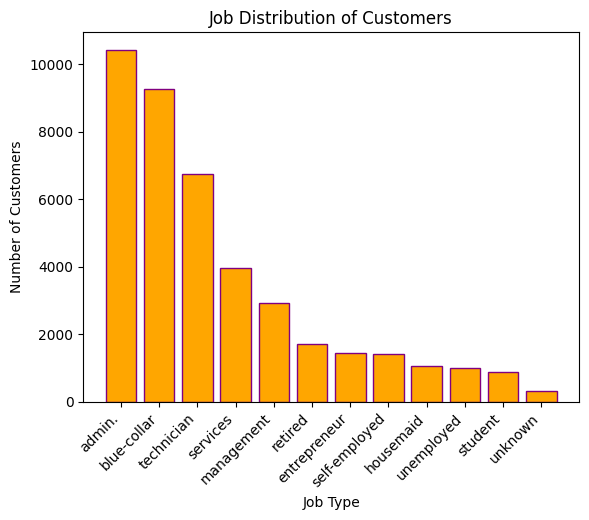

In [8]:
# Job distribution
job_counts = df['job'].value_counts()
plt.figure()
plt.bar(job_counts.index, job_counts.values,color = '#ffa600', edgecolor = 'purple')
plt.title("Job Distribution of Customers")
plt.xlabel("Job Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation = 45, ha = 'right')
# plt.tight_layout()
plt.show()

## Balance & Deposit Trends

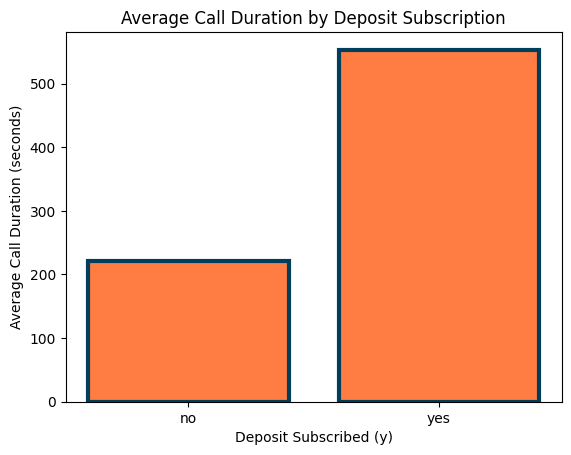

In [9]:
# Average balance by deposit subscription
avg_duration = df.groupby('y')['duration'].mean()

plt.figure()
plt.bar(avg_duration.index, avg_duration.values, color = '#ff7c43', edgecolor = '#003f5c', linewidth = 3)
plt.title("Average Call Duration by Deposit Subscription")
plt.xlabel("Deposit Subscribed (y)")
plt.ylabel("Average Call Duration (seconds)")
plt.show()

## Campaign Effectiveness

In [10]:
# Contact method analysis
# Number of contacts vs deposit subscription
contact_vs_deposit = df.groupby(['y', 'contact']).size().unstack(fill_value=0)

<Figure size 640x480 with 0 Axes>

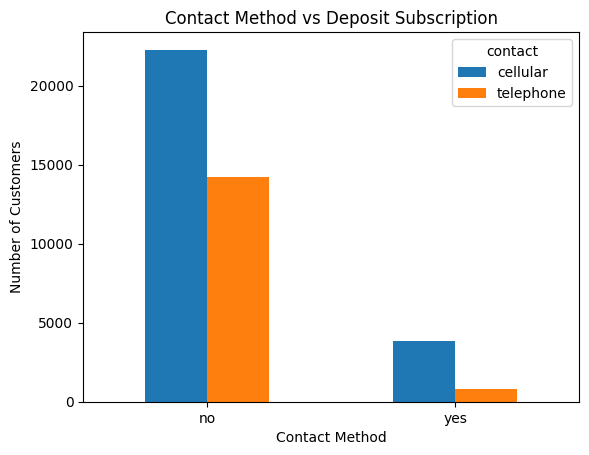

In [11]:
# Plot bar chart
plt.figure()
contact_vs_deposit.plot(kind='bar')
plt.title("Contact Method vs Deposit Subscription")
plt.xlabel("Contact Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation = 0)
plt.show()

In [12]:
# Group by campaign (number of contacts) and subscription
contact_vs_deposit = df.groupby(['campaign', 'y']).size().unstack(fill_value=0)

<Figure size 640x480 with 0 Axes>

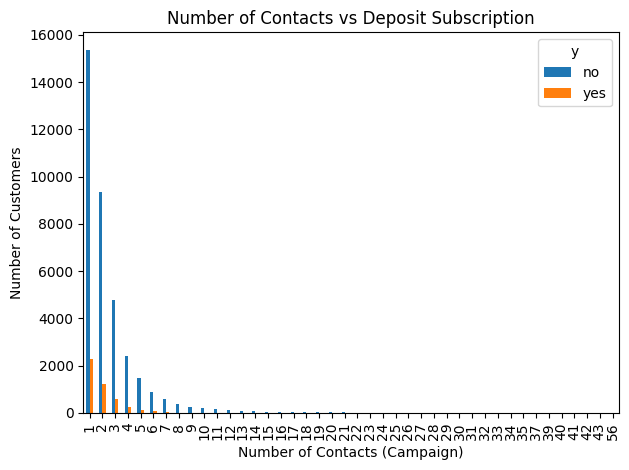

In [13]:
# Plot bar chart
plt.figure()
contact_vs_deposit.plot(kind='bar')
plt.title("Number of Contacts vs Deposit Subscription")
plt.xlabel("Number of Contacts (Campaign)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

## Correlation Heatmap

In [14]:
# Correlation of numerical variables
# Correlation matrix
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[num_cols].corr()

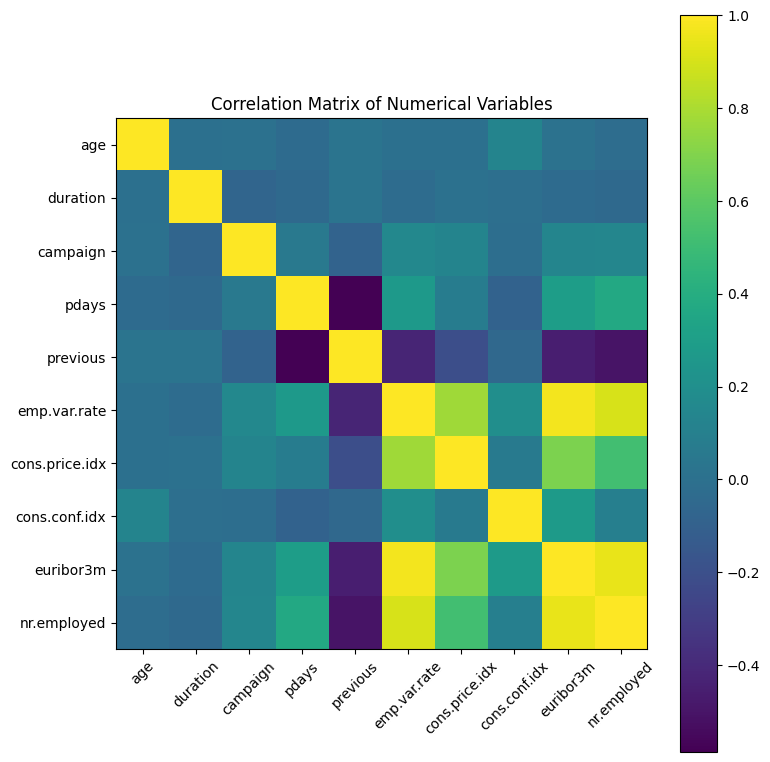

In [15]:
# Plot heatmap using matplotlib (no colors specified explicitly)
plt.figure(figsize=(8, 8))
plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Matrix of Numerical Variables")
plt.tight_layout()
plt.show()

## Predictive Modeling (Logistic Regression)

In [16]:
# Encode categorical variables
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

C:\Users\Yashita Chavan\AppData\Local\Temp\ipykernel_5520\3229756121.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\Yashita Chavan\AppData\Local\Temp\ipykernel_5520\3229756121.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\Yashita Chavan\AppData\Local\Temp\ipykernel_5520\3229756121.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [17]:
# Features & target
X = df.drop('y', axis=1)
y = df['y']

In [18]:
# Scale features (VERY IMPORTANT for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

In [20]:
# Logistic Regression with faster solver
model = LogisticRegression(
    max_iter=300,
    solver='liblinear'
)

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,300
,multi_class,'deprecated'


In [21]:
# Predictions
y_pred = model.predict(X_test)

#### Evolution

In [22]:
#accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_df = pd.DataFrame({
    'Metric': ['Accuracy'],
    'Value': [accuracy]
})

accuracy_df

,Metric,Value
0,Accuracy,0.909365


In [23]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=['Actual No', 'Actual Yes'],
    columns=['Predicted No', 'Predicted Yes']
)

conf_matrix_df

,Predicted No,Predicted Yes
Actual No,8880,254
Actual Yes,679,481


In [24]:
#Classification Report
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df

,precision,recall,f1-score,support
0,0.928967,0.972192,0.950088,9134.000000
1,0.654422,0.414655,0.507652,1160.000000
accuracy,0.909365,0.909365,0.909365,0.909365
macro avg,0.791695,0.693423,0.728870,10294.000000
weighted avg,0.898030,0.909365,0.900231,10294.000000


#### Feature importance

In [25]:
# Get feature names
feature_names = X.columns

In [26]:
# Get coefficients
coefficients = model.coef_[0]

In [27]:
# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute_Coefficient': np.abs(coefficients)
})

In [28]:
# Sort by importance
feature_importance_df = feature_importance_df.sort_values(
    by='Absolute_Coefficient', ascending=False
)

feature_importance_df

,Feature,Coefficient,Absolute_Coefficient
15,emp.var.rate,-1.414112,1.414112
18,euribor3m,1.238016,1.238016
10,duration,1.211642,1.211642
19,nr.employed,-1.048827,1.048827
16,cons.price.idx,0.371965,0.371965
7,contact,-0.348323,0.348323
8,month,-0.270622,0.270622
12,pdays,-0.211844,0.211844
14,poutcome,0.158784,0.158784
4,default,-0.142317,0.142317


## Key Takeaways
- Certain age groups and job categories are more likely to subscribe.
- Higher balances correlate with higher subscription rates.
- Cellular contact is more effective than telephone.
- Campaign duration and number of contacts influence outcomes.
- Logistic regression shows which features are strongest predictors.